# **Install Packages**

In [ ]:
colab_requirements = [
    "pip install tensorflow",
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",
    "pip install webrtcvad",
    "pip install scipy",
    "pip install matplotlib",
    "pip install pandas",
    "pip install pydub"
]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

# **Conncet Google Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Import Packages**

In [ ]:
# Noise Reduction
import scipy.io.wavfile as wf
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import urllib.request

# For audio files and processing
import io
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# For DL Model training and testing
import os, glob, pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

## **Function for custom Confusion matrix**

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True, 
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
 
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]
 
    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        # group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
        group_percentages = ["{0:.2%}".format(value) for value in np.array([cf/np.sum(cf) for cf in cf]).flatten()]
 
    else:
        group_percentages = blanks
 
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))
        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False
    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories, annot_kws={"size":13})
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
        # plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        plt.savefig('filename.png', dpi=300)
    else:
        plt.xlabel(stats_text)
        plt.savefig('filename.png', dpi=300)
    if title:
        plt.title(title)


## **Function for ploting Training and Testing Accuracy and Error Graph**

In [ ]:
def plot_history(history):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

    # create accuracy sublpot
    axs[0,0].plot(history.history["accuracy"], label="train accuracy")
    axs[0,0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0,0].set_ylabel("Accuracy")
    axs[0,0].legend(loc="lower right")
    axs[0,0].set_title("Accuracy evaluatiom")

    # create error sublpot
    axs[0,1].plot(history.history["loss"], label="train error")
    axs[0,1].plot(history.history["val_loss"], label="test error")
    axs[0,1].set_ylabel("Error")
    axs[0,1].set_xlabel("Epoch")
    axs[0,1].legend(loc="upper right")
    axs[0,1].set_title("Error evaluation")

    plt.show()

# **NOISE REDUCTION**

In [ ]:
def Noise_Reduction(path):
  rate, data = wavfile.read(path)                                                                       # Read audio file from the given path
  noise_reduced = nr.reduce_noise(y=data, sr=rate)                                                      # Apply Noise Reduction method
  wavfile.write("/content/sample_data/Noise_Reduced_Signal.wav",rate,noise_reduced.astype(np.int16))    # Write the noise reduced WAV file

# **Emotion :**



*   0 - "Angry"
*   1 - "Calm"
*   2 - "Disgust"
*   3 - "Fearful"
*   4 - "Happy"
*   5 - "Neutral"
*   6 - "Sad"
*   7 - "Surprised"

# **Feature Extraction**

In [ ]:
root = "/content/drive/MyDrive/ProjectSpeechEmotion/"
with open(root+"feature_MfccCremaMel3.pkl", "rb") as f:                
      x,y = pickle.load(f)                               
#len(y) #check if equals to total data              

In [ ]:
len(x[674])  # Total number feature values

180

## **Split Train & Test data**

In [ ]:
# Split the dataset
x_train,x_test,y_train,y_test = train_test_split(np.array(x), y, test_size=0.2, random_state=9)

In [ ]:
# Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(3776, 944)


In [ ]:
# Get the number of features extracted
print('Total number of Features extracted: ', x_train[0].shape)

Total number of Features extracted:  (180,)


# **Data Preprocessing**

In [ ]:
# Scaling the Feature values
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [ ]:
x_train[500]

In [ ]:
x_train_scaled[500]

In [ ]:
# Label each emotion with a number

convert_emotions=['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(convert_emotions)

LabelEncoder()

In [ ]:
y_test_int = le.transform(y_test)
y_train_int = le.transform(y_train)

In [ ]:
# No of Test Dataset for each emotion
from collections import Counter
Counter(y_test)

Counter({'angry': 119,
         'calm': 47,
         'disgust': 118,
         'fearful': 150,
         'happy': 131,
         'neutral': 128,
         'sad': 139,
         'surprised': 112})


# **Trainning ANN Model**

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
loss_fn = keras.losses.SparseCategoricalCrossentropy()

In [ ]:
# Building ANN architecture
model_ANN = keras.Sequential([
    # 1st Hidden Layer with Inputs
    keras.layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    # 2nd Hidden layer
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    # 3rd Hidden layer
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    # 4th Hidden layer
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    # 5th Hidden layer
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    # Output layer
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
# Compile ANN Moddel
model_ANN.compile(optimizer = opt,
              loss = loss_fn,
              metrics=['accuracy'])

In [ ]:
# Fitting ANN to the training set with scaled value
history_ANN = model_ANN.fit(x_train, y_train_int,
              validation_data=(x_test, y_test_int),
              epochs=150,
              batch_size=64)

In [ ]:
model_ANN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              185344    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

# **Evaluating ANN Model**

In [ ]:
# Calculate the accuracy of our model with scaaled feature values
y_pred = model_ANN.predict(x_test)
y_pred_int = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true=y_test_int, y_pred=y_pred_int)

# Print the accuracy
print("Accuracy of ANN with scaled feature values: {:.2f}%".format(accuracy*100))

Accuracy of ANN with scaled feature values: 84.43%


In [ ]:
# Class names for confusion matrix
class_names=['angry', 'calm', 'disgust','fearful', 'happy', 'neutral', 'sad', 'surprised']

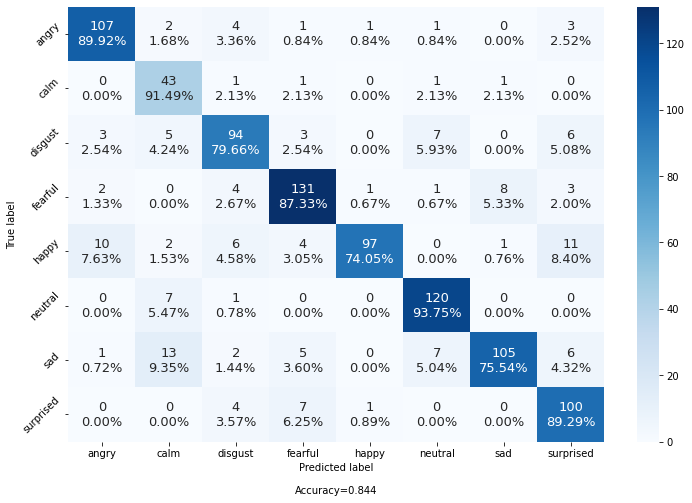

In [ ]:
# Making confusion matrix for scaled feature value
cm = confusion_matrix(y_test_int, y_pred_int)
make_confusion_matrix(cm, figsize=(12,8),count=True,categories=class_names,percent=True,cbar=True,cmap='Blues')

In [ ]:
# Classification Report for scaled feaature values
print(classification_report(y_test_int,y_pred_int))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       119
           1       0.60      0.91      0.72        47
           2       0.81      0.80      0.80       118
           3       0.86      0.87      0.87       150
           4       0.97      0.74      0.84       131
           5       0.88      0.94      0.91       128
           6       0.91      0.76      0.83       139
           7       0.78      0.89      0.83       112

    accuracy                           0.84       944
   macro avg       0.83      0.85      0.84       944
weighted avg       0.86      0.84      0.85       944



In [ ]:
# Plot accuracy and error over epoch
plot_history(history_ANN)

# **Training LSTM Model**

In [ ]:
# With Scaled Feature value
X_train_scaled_input = np.reshape(x_train_scaled, (x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
X_test_scaled_input = np.reshape(x_test_scaled, (x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

X_train_scaled_input.shape, X_test_scaled_input.shape

In [ ]:
# Building LSTM architecture

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout, Bidirectional
 
inputs = X_train_scaled_input                                       
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))

# 3 LSTM layers
x = keras.layers.LSTM(units=512, return_sequences=True)(inputs)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.LSTM(units=256 , return_sequences=True)(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.LSTM(units=128 , return_sequences=True)(x)
x = keras.layers.Dropout(0.2)(x)

# 2 Dense layer
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)

# Output layer
outputs = keras.layers.Dense(8, activation='softmax')(x)

# Compile LSTM model
model_LSTM = keras.Model(inputs=inputs, outputs=outputs)
model_LSTM.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])


In [ ]:
# LSTM Summary
model_LSTM.summary()

In [ ]:
#  Fitting LSTM to the training set with scaled value
history_LSTM_scaled = model_LSTM.fit(X_train_scaled_input, y_train_int,
              validation_data=(X_test_scaled_input, y_test_int),
              epochs=100,
              batch_size=32)

# **Evaluating LSTM Model**

In [ ]:
# Calculate the accuracy with normal feature values

y_pred = model_LSTM_normal.predict(X_test_inputLSTM)
y_pred_reshaped = np.reshape(y_pred, (y_pred.shape[0], y_pred.shape[2]))
y_pred_int = np.argmax(y_pred_reshaped, axis=1)

accuracy = accuracy_score(y_true=y_test_int, y_pred=y_pred_int)

# Print the accuracy
print("Accuracy of LSTM with normal feature values: {:.2f}%".format(accuracy*100))

Accuracy of LSTM with normal feature values: 87.39%


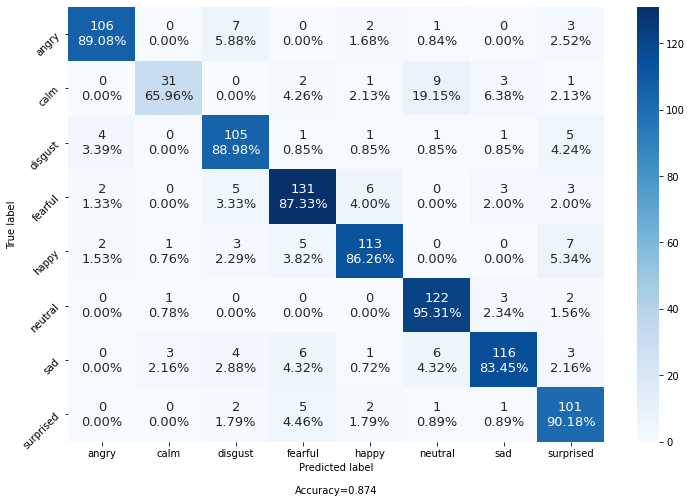

In [ ]:
# Making confusion matrix for scaled feature value
cm = confusion_matrix(y_test_int, y_pred_int)
make_confusion_matrix(cm, figsize=(12,8),count=True,categories=class_names,percent=True,cbar=True,cmap='Blues')

In [ ]:
# Classification report for normal feature value
print(classification_report(y_test_int,y_pred_int))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       119
           1       0.86      0.66      0.75        47
           2       0.83      0.89      0.86       118
           3       0.87      0.87      0.87       150
           4       0.90      0.86      0.88       131
           5       0.87      0.95      0.91       128
           6       0.91      0.83      0.87       139
           7       0.81      0.90      0.85       112

    accuracy                           0.87       944
   macro avg       0.87      0.86      0.86       944
weighted avg       0.88      0.87      0.87       944



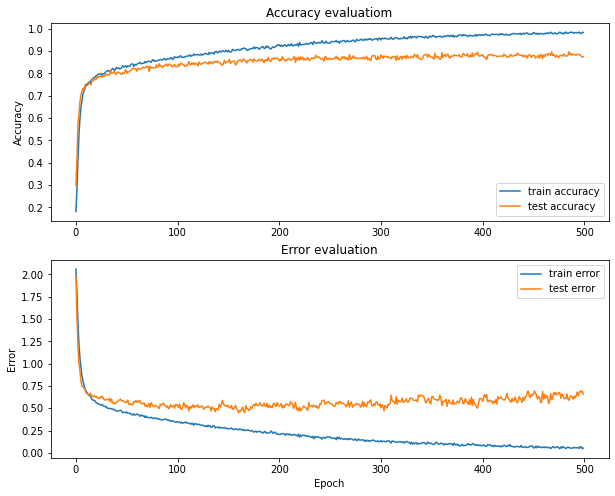

In [ ]:
# Plot accuracy and error over epoch
plot_history(history_LSTM_normal)

# **Saving model in JSON Format**


In [ ]:
#saving model in json format
model_path = '/content/drive/MyDrive/ProjectSpeechEmotion/'
model_json = model_LSTM_normal.to_json()
with open(model_path+"model_LSTM_normal.json", "w") as json_file:
    json_file.write(model_json)
  
model_LSTM_normal.save_weights(model_path+"model_LSTM_normal.h5")

# Load model in JSON format

In [ ]:
model_path = '/content/drive/MyDrive/ProjectSpeechEmotion/'
#Loading model in json format

from keras.models import model_from_json
json_file = open(model_path+'model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights(model_path+'model.h5')

model.compile(loss='binary_crossentropy',
         optimizer='Adam',
         metrics=[tf.keras.metrics.BinaryAccuracy()])